In [1]:
import numpy as np
import pandas as pd

df= pd.read_csv("D:/diabetes_kag.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X= df.drop(columns= ['Outcome'])
Y= df.Outcome

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.23, random_state = 42)

In [5]:
print(x_train.shape)
print(x_test.shape)

(591, 8)
(177, 8)


In [6]:
from sklearn.metrics import accuracy_score, classification_report

In [7]:
## Logistic Regression, SML

""""
Logistic Regression models the probability of the target variable (y) based on one or more input features (X) using a logistic function, also known as the sigmoid function. The logistic function maps the input features to a probability value between 0 and 1, which represents the likelihood of the event occurring.

The logistic function is defined as:
p = 1 / (1 + e^(-z))

where p is the probability of the event occurring, e is the base of the natural logarithm, and z is a linear combination of the input features:

z = w^T * X + b

where w is the weight vector, X is the input feature vector, and b is the bias term.
"""


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 100)

'''
*100 iterations to reduce computational time
*Avoid overfitting
'''

'\n*100 iterations to reduce computational time\n*Avoid overfitting\n'

In [8]:
model.fit(x_train, y_train)

C:\Users\Jatin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
prediction_train= model.predict(x_train)

In [10]:
print("Accuracy:", accuracy_score(y_train, prediction_train))

Accuracy: 0.7817258883248731


In [11]:
predictions= model.predict(x_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7401129943502824


<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

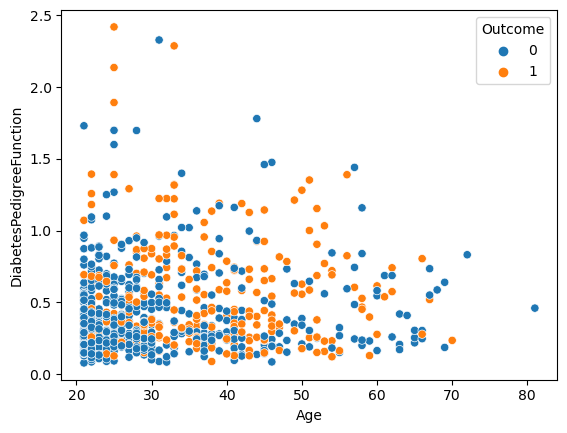

In [13]:
sns.scatterplot(data = df, y = 'DiabetesPedigreeFunction', x='Age', hue='Outcome')

In [14]:
import math

In [15]:
# Checking if object exists as np array
x_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
745,12,100,84,33,105,30.0,0.488,46
165,6,104,74,18,156,29.9,0.722,41
164,0,131,88,0,0,31.6,0.743,32
28,13,145,82,19,110,22.2,0.245,57
608,0,152,82,39,272,41.5,0.270,27
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [16]:
# The logistic function 
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [17]:
# f-string format 

value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")


sigmoid(0) = 0.5


In [18]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


In [19]:
def compute_cost(X, y, w, b,*argv):
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.matmul(w,X.iloc[i].values.reshape(-1,1)) + b
        f = sigmoid(z)
        cost += (-y.iloc[i] * np.log(f)) - ((1-y.iloc[i]) * np.log(1-f))
    
    total_cost = (1/m) * cost 
    return total_cost.item()  # Convert the result to a single number

m, n = x_train.shape
initial_w = np.zeros(n)
initial_b = 0
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [20]:
def compute_gradient(X, y, w, b,*argv):
    n = len(y)
    dj_db = 0
    dj_dw = np.zeros(len(w))
    for i in range(n):
        z_wb = np.dot(w, X.iloc[i]) + b
        f_wb = sigmoid(z_wb)
        dj_db += (f_wb - y.iloc[i])
        dj_dw += (f_wb - y.iloc[i]) * X.iloc[i, :]
    dj_db /= n
    dj_dw /= n
    return dj_db, dj_dw

In [21]:
n = x_train.shape[1]  # Get the number of features (n)
initial_w = np.zeros(n)
initial_b = 0

In [22]:
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):0.15313028764805414
dj_dw at initial w and b (zeros):[0.26818950930626057, 11.306260575296108, 9.887478849407783, 2.643824027072758, 5.738578680203045, 3.772419627749573, 0.04777664974619289, 3.515228426395939]


In [23]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(X)
    
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters/100) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   W: {w_in}")
        
    return w_in, b_in, J_history, w_history

In [24]:
np.random.seed(1)
initial_w = np.zeros(n)
initial_b = 0

iterations = 10
alpha = 0.001

w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations,0)


Iteration    0: Cost     1.19   W: Pregnancies                -0.000268
Glucose                    -0.011306
BloodPressure              -0.009887
SkinThickness              -0.002644
Insulin                    -0.005739
BMI                        -0.003772
DiabetesPedigreeFunction   -0.000048
Age                        -0.003515
Name: 745, dtype: float64
Iteration    1: Cost     4.14   W: Pregnancies                 0.001077
Glucose                     0.029911
BloodPressure               0.010379
SkinThickness               0.003746
Insulin                     0.026316
BMI                         0.006230
DiabetesPedigreeFunction    0.000107
Age                         0.007126
Name: 745, dtype: float64
Iteration    2: Cost     3.93   W: Pregnancies                -0.001037
Glucose                    -0.041052
BloodPressure              -0.033833
SkinThickness              -0.009026
Insulin                    -0.019691
BMI                        -0.013301
DiabetesPedigreeFunction   -0

In [25]:
print(b)
w

-0.00021215994863965073


Pregnancies                 0.002354
Glucose                     0.039872
BloodPressure              -0.004036
SkinThickness              -0.000212
Insulin                     0.022874
BMI                         0.004424
DiabetesPedigreeFunction    0.000125
Age                         0.008617
Name: 745, dtype: float64

In [26]:
x_test = x_test.to_numpy()

In [27]:
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += np.dot(w[j],X[i,j])
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = (f_wb >= 0.5)
        
    ### END CODE HERE ### 
    return p

In [28]:
predictions_array = predict(x_test, w, b)

In [29]:
predictions_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [30]:
print("Accuracy:", accuracy_score(y_test, predictions_array))

Accuracy: 0.3559322033898305


In [31]:
p = predict(x_test, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_test) * 100))

Train Accuracy: 35.593220
